# Z Ground truth

Average Accuracy: 0.94
Average Precision: 0.76
Average Recall: 0.76
Average F1-Score: 0.76
Average Cohen's Kappa: 0.72
Average IoU Score: 0.61


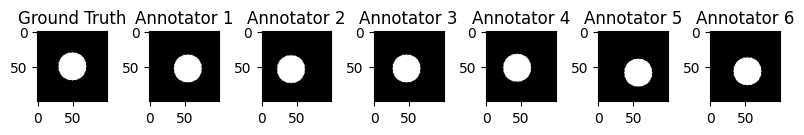

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    cohen_kappa_score,
    accuracy_score,
    jaccard_score,
    f1_score,
    precision_score,
    recall_score,
)


def dice_score(ground_truth, prediction):
    intersection = np.logical_and(ground_truth, prediction)
    dice = 2.0 * np.sum(intersection) / (np.sum(ground_truth) + np.sum(prediction))
    return dice


# Tworzenie symulowanego obrazu
image_width = 100
image_height = 100
image_size = (image_width, image_height)
ground_truth = np.zeros(image_size)
center = (50, 50)
radius = 20
displacement = 10

for i in range(image_size[0]):
    for j in range(image_size[1]):
        if np.sqrt((i - center[0])**2 + (j - center[1])**2) <= radius:
            ground_truth[i, j] = 1

# Symulacja adnotacji przez adnotatorów
num_annotators = 6
annotations = []

for _ in range(num_annotators):
    annotation = np.zeros(image_size)
    displacement_x = np.random.randint(-displacement, displacement)
    displacement_y = np.random.randint(-displacement, displacement)
    
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            if np.sqrt((i - center[0] - displacement_x)**2 + (j - center[1] - displacement_y)**2) <= radius:
                annotation[i, j] = 1
    
    annotations.append(annotation)
# Obliczanie różnych metryk
kappa_scores = []
IoU_scores = []
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []


for annotation in annotations:
    agreement_rate = accuracy_score(ground_truth.flatten(), annotation.flatten())
    kappa = cohen_kappa_score(ground_truth.flatten(), annotation.flatten())
    IoU = jaccard_score(ground_truth.flatten(), annotation.flatten())
    f1 = f1_score(ground_truth.flatten(), annotation.flatten())
    accuracy = accuracy_score(ground_truth.flatten(), annotation.flatten())
    precision = precision_score(ground_truth.flatten(), annotation.flatten())
    recall = recall_score(ground_truth.flatten(), annotation.flatten())


    kappa_scores.append(kappa)
    IoU_scores.append(IoU)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)



# Obliczenie średnich wyników dla wszystkich adnotatorów
average_kappa_score = np.mean(kappa_scores)
average_IoU_score = np.mean(IoU_scores)
average_f1_score = np.mean(f1_scores)
average_accuracy_score = np.mean(accuracy_scores)
average_precision_score = np.mean(precision_scores)
average_recall_score = np.mean(recall_scores)


# Wyświetlenie wyników
print(f"Average Accuracy: {average_accuracy_score:.2f}")
print(f"Average Precision: {average_precision_score:.2f}")
print(f"Average Recall: {average_recall_score:.2f}")
print(f"Average F1-Score: {average_f1_score:.2f}")
print(f"Average Cohen's Kappa: {average_kappa_score:.2f}")
print(f"Average IoU Score: {average_IoU_score:.2f}")





# Wyświetlanie obrazu oryginalnego
plt.figure(figsize=(8, 4))
plt.subplot(1, num_annotators + 1, 1)
plt.imshow(ground_truth, cmap='gray')
plt.title('Ground Truth')

# Wyświetlanie adnotacji adnotatorów
for i, annotation in enumerate(annotations, start=2):
    plt.subplot(1, num_annotators + 1, i)
    plt.imshow(annotation, cmap='gray')
    plt.title(f'Annotator {i-1}')

plt.tight_layout()
plt.show()


# Bez ground truth


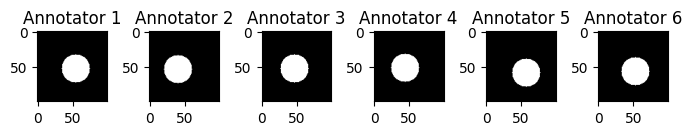

,metrics,annotator 1,annotator 2,annotator 3,annotator 4,annotator 5,annotator 6,mean voting
0,accuracy,0.929480,0.918840,0.941560,0.933800,0.913880,0.937160,0.951633
1,recall,0.719491,0.677168,0.767542,0.736675,0.657438,0.750040,0.901523
2,f1,0.719491,0.677168,0.767542,0.736675,0.657438,0.750040,0.782132
3,dice,0.719491,0.677168,0.767542,0.736675,0.657438,0.750040,0.782132
4,kappa,0.679161,0.630754,0.734121,0.698816,0.608188,0.714102,0.755465
5,precision,0.719491,0.677168,0.767542,0.736675,0.657438,0.750040,0.690666
6,IoU,0.572111,0.534160,0.635850,0.605354,0.508225,0.609832,0.646662
7,Ap,0.563669,0.523756,0.630353,0.597454,0.496749,0.603512,0.636252


In [66]:
import pandas as pd
from sklearn.metrics import (
    cohen_kappa_score,
    jaccard_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    average_precision_score
)
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd

data = {
    'metrics': ['accuracy','recall', 'f1','dice','kappa','precision','IoU','Ap']
}

df = pd.DataFrame(data)


# Iteracja przez adnotatorów jako "ground truth"
for i in range(num_annotators):
    ground_truth_annotation = annotations[i]
    kappa_scores = []
    IoU_scores = []
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    dice_scores = []
    Ap_scores = []


    # Porównywanie innych adnotatorów do "ground truth"
    for j in range(num_annotators):
        if i != j:  # Pomijamy porównywanie adnotatora z samym sobą
            annotator_annotation = annotations[j]

            kappa = cohen_kappa_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            IoU = jaccard_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            f1 = f1_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            accuracy = accuracy_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            precision = precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            recall = recall_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            dice = dice_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
            Ap = average_precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())

            kappa_scores.append(kappa)
            IoU_scores.append(IoU)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            dice_scores.append(dice)
            Ap_scores.append(Ap)
    
    average_kappa_score = np.mean(kappa_scores)
    average_IoU_score = np.mean(IoU_scores)
    average_f1_score = np.mean(f1_scores)
    average_accuracy_score = np.mean(accuracy_scores)
    averagee_precision_score = np.mean(precision_scores)
    average_recall_score = np.mean(recall_scores)
    average_dice_score = np.mean(dice_scores)
    average_Ap_scores = np.mean(Ap_scores)

    df.loc[df['metrics'] == 'f1', f'annotator {i+1}'] = average_f1_score
    df.loc[df['metrics'] == 'kappa', f'annotator {i+1}'] = average_kappa_score
    df.loc[df['metrics'] == 'IoU', f'annotator {i+1}'] = average_IoU_score
    df.loc[df['metrics'] == 'accuracy', f'annotator {i+1}'] = average_accuracy_score
    df.loc[df['metrics'] == 'precision', f'annotator {i+1}'] = averagee_precision_score
    df.loc[df['metrics'] == 'recall', f'annotator {i+1}'] = average_recall_score
    df.loc[df['metrics'] == 'dice', f'annotator {i+1}'] = average_dice_score
    df.loc[df['metrics'] == 'Ap', f'annotator {i+1}'] = average_Ap_scores


# Wykonanie średniego głosowania dla segmentacji obrazu
mean_voting_result = np.mean(annotations, axis=0)
binary_mean_voting_result = (mean_voting_result > 0.5).astype(int)
ground_truth_annotation = binary_mean_voting_result  

kappa_scores = []
IoU_scores = []
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
dice_scores = []
Ap_scores = []

for j in range(num_annotators):
        annotator_annotation = annotations[j]

        kappa = cohen_kappa_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        IoU = jaccard_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        f1 = f1_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        accuracy = accuracy_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        precision = precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        recall = recall_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        dice = dice_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())
        Ap = average_precision_score(ground_truth_annotation.flatten(), annotator_annotation.flatten())

        kappa_scores.append(kappa)
        IoU_scores.append(IoU)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        dice_scores.append(dice)
        Ap_scores.append(Ap)
    
average_kappa_score = np.mean(kappa_scores)
average_IoU_score = np.mean(IoU_scores)
average_f1_score = np.mean(f1_scores)
average_accuracy_score = np.mean(accuracy_scores)
averagee_precision_score = np.mean(precision_scores)
average_recall_score = np.mean(recall_scores)
average_dice_score = np.mean(dice_scores)
average_Ap_scores = np.mean(Ap_scores)

df.loc[df['metrics'] == 'f1', 'mean voting'] = average_f1_score
df.loc[df['metrics'] == 'kappa', 'mean voting'] = average_kappa_score
df.loc[df['metrics'] == 'IoU', 'mean voting'] = average_IoU_score
df.loc[df['metrics'] == 'accuracy', 'mean voting'] = average_accuracy_score
df.loc[df['metrics'] == 'precision', 'mean voting'] = averagee_precision_score
df.loc[df['metrics'] == 'recall', 'mean voting'] = average_recall_score
df.loc[df['metrics'] == 'dice', 'mean voting'] = average_dice_score
df.loc[df['metrics'] == 'Ap', 'mean voting'] = average_Ap_scores

# Wyświetlenie adnotacji adnotatorów
plt.figure(figsize=(8, 4))
for i, annotation in enumerate(annotations, start=1):
    plt.subplot(1, num_annotators+1, i)
    plt.imshow(annotation, cmap='gray')
    plt.title(f'Annotator {i}')
#plt.subplot(1,num_annotators+1,num_annotators+1)    
#plt.imshow(binary_mean_voting_result, cmap='gray')
#plt.title('Mean Voting')

plt.tight_layout()
plt.show()
# Wyświetlenie wyników
df


/tmp/ipykernel_21153/3232658797.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_label = mode(pixel_annotations).mode[0]  # Wybierz najczęściej występującą etykietę


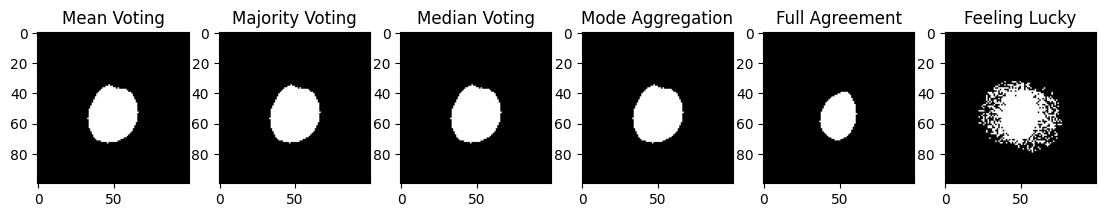

In [67]:
from scipy.stats import mode
import random


def majority_voting(annotations):
    
    result = np.zeros_like(annotations[0]) 

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            annotations_at_pixel = [annotation[i][j] for annotation in annotations]
            majority_class = np.argmax(np.bincount(annotations_at_pixel))
            result[i, j] = majority_class

    return result

def feeling_lucky_pixel(annotations):

    result = np.zeros_like(annotations[0]) 
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            pixel_values = [annotation[i][j] for annotation in annotations]
            random_label = random.choice(pixel_values)
            result[i][j] = random_label
    
    return result


def mode_aggregation(annotations):

    result = np.zeros_like(annotations[0]) 
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            pixel_annotations = [annotation[i][j] for annotation in annotations]
            most_common_label = mode(pixel_annotations).mode[0]  # Wybierz najczęściej występującą etykietę
            result[i][j] = most_common_label
    
    return result


# Wykonanie średniego głosowania dla segmentacji obrazu

mean_voting_result = np.mean(annotations, axis=0)
binary_mean_voting_result = (mean_voting_result > 0.5).astype(int)

# Wykonaj Majority Voting
majority_voting_result = majority_voting(annotations)
# Wykonaj median voting
median_voting = np.median(annotations, axis=0)
median_voting = np.round(median_voting)
#Mode Agregation
mode_aggregation_result = mode_aggregation(annotations)

# Pełne porozumienie (Full Agreement) dla pikseli
all_equal = np.all(annotations == annotations[0], axis=0)
full_agreement_result = np.zeros_like(annotations[0])
full_agreement_result[all_equal] = annotations[0][all_equal]

# Feeling Lucky (Szczęśliwe Uderzenie) - wspólny obraz wynikowy
feeling_lucky_result = feeling_lucky_pixel(annotations)

# Wyświetl obraz wynikowy
plt.figure(figsize=(16, 8))
plt.subplot(1, 7, 1)
plt.imshow(binary_mean_voting_result, cmap='gray')
plt.title('Mean Voting')
plt.subplot(1, 7, 2)
plt.imshow(majority_voting_result, cmap='gray')
plt.title("Majority Voting")
plt.subplot(1, 7, 3)
plt.imshow(median_voting, cmap='gray')
plt.title("Median Voting")
plt.subplot(1, 7, 4)
plt.imshow(mode_aggregation_result, cmap='gray')
plt.title("Mode Aggregation")
plt.subplot(1, 7, 5)
plt.imshow(full_agreement_result, cmap='gray')
plt.title("Full Agreement")
plt.subplot(1, 7, 6)
plt.imshow(feeling_lucky_result, cmap='gray')
plt.title("Feeling Lucky")
plt.show()



# Analiza spójności

Cohen's Kappa Matrix:
[[0.         0.50227258 0.67879748 0.6060037  0.77069961 0.83803385]
 [0.50227258 0.         0.8152858  0.86806129 0.40946052 0.55868775]
 [0.67879748 0.8152858  0.         0.91901693 0.54958853 0.70791499]
 [0.6060037  0.86806129 0.91901693 0.         0.47315507 0.62784183]
 [0.77069961 0.40946052 0.54958853 0.47315507 0.         0.83803385]
 [0.83803385 0.55868775 0.70791499 0.62784183 0.83803385 0.        ]]
IoU Coefficient Matrix:
[[0.         0.39356984 0.56149068 0.48757396 0.66600398 0.75191638]
 [0.39356984 0.         0.72191781 0.79315264 0.31899265 0.44316877]
 [0.56149068 0.72191781 0.         0.86775632 0.43493151 0.59315589]
 [0.48757396 0.79315264 0.86775632 0.         0.36928105 0.5090036 ]
 [0.66600398 0.31899265 0.43493151 0.36928105 0.         0.75191638]
 [0.75191638 0.44316877 0.59315589 0.5090036  0.75191638 0.        ]]


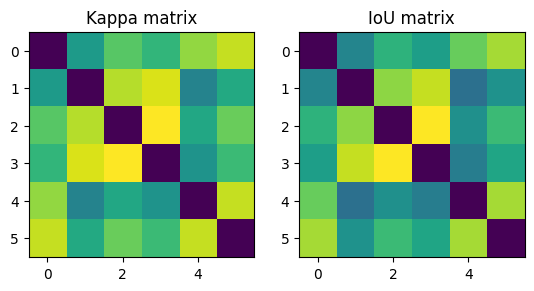

In [65]:
from sklearn.metrics import cohen_kappa_score

# Oblicz macierz Cohen's Kappa dla wszystkich par adnotatorów
kappa_matrix = np.zeros((num_annotators, num_annotators))

for i in range(num_annotators):
    for j in range(i + 1, num_annotators):
        kappa = cohen_kappa_score(annotations[i].flatten(), annotations[j].flatten())
        kappa_matrix[i, j] = kappa
        kappa_matrix[j, i] = kappa


# Oblicz macierz współczynników IoUa między adnotacjami adnotatorów
IoU_matrix = np.zeros((num_annotators, num_annotators))

for i in range(num_annotators):
    for j in range(i + 1, num_annotators):
        IoU = jaccard_score(annotations[i].flatten(), annotations[j].flatten())
        IoU_matrix[i, j] = IoU
        IoU_matrix[j, i] = IoU        

# Wyświetl macierz spójności
print("Cohen's Kappa Matrix:")
print(kappa_matrix)

print("IoU Coefficient Matrix:")
print(IoU_matrix)

plt.subplot(1,2,1)
plt.imshow(kappa_matrix)
plt.title("Kappa matrix")
plt.subplot(1,2,2)
plt.imshow(IoU_matrix)
plt.title("IoU matrix")
plt.show()